# Lutte contre la criminalité organisée Algorithme de détection de faux billets

*Etude data - Projet 6 - Nalron (décembre 2019) / ENSAE-ENSAI Formation Continue*


---

## Classification par l'algorithme K-Means (centres mobiles)
*Utilisation du package «scikit-learn»*


Une fois le clustering réalisé, les clusters seront visualisés dans le premier plan factoriel de l'ACP.

### Choix du nombre du cluster :
Le contexte métier nous oriente naturellement vers un k=2, traçons l'inertie pour vérifier que le k=2 est bien la solution optimale. 

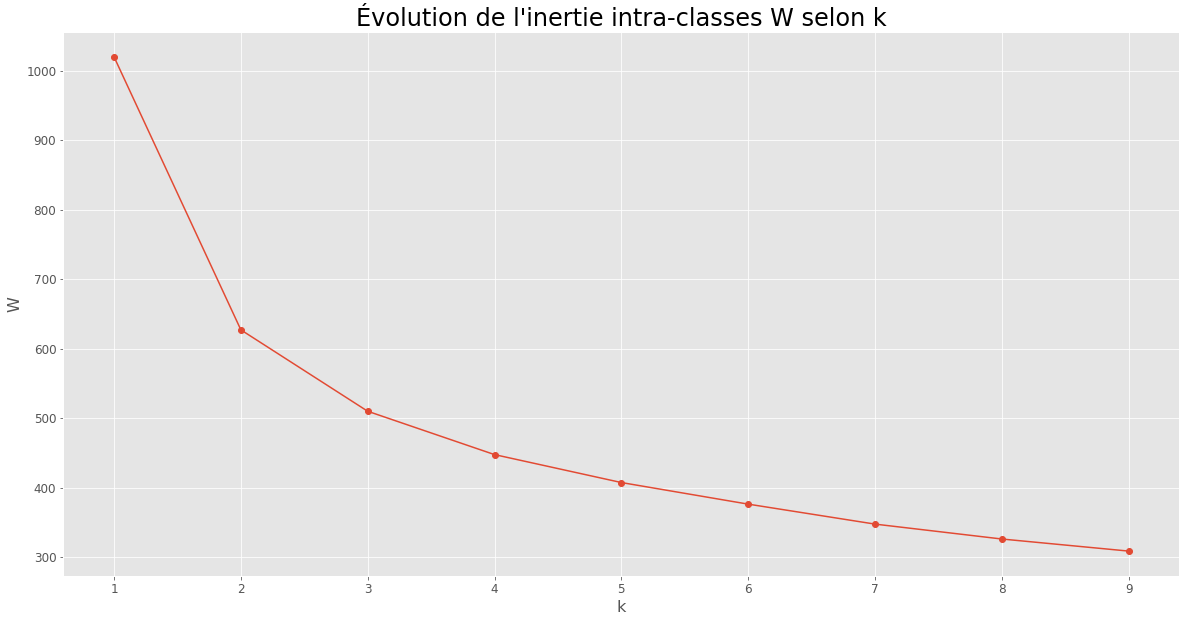

In [40]:
#Liste dans laquelle on stocke les inerties
inerties=[]

#Boucle de 1 à 9 pour tester toutes ces possibiliéts
for k in range(1, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), inerties, marker='o')
plt.xlabel('k')
plt.ylabel('W')
plt.title("Évolution de l'inertie intra-classes W selon k")

plt.savefig("p6_graphic/kmeans_inertie.png")
plt.show()

*Par la Méthode du coude, la confirmation d'un k=2 prend tout son sens. En effet, l'ajout d'un ou plusieurs groupes n'apporterait pas d'information pertinente dans le contexte. Un k>2 serait possible dans la condition d'un jeu de données apportant une précision plus fine, comme par exemple dans la valorisation du billet, cela pourrait permettre de classifier les billets selon leur valeur en plus du type.*

In [41]:
#Classification des individus par apprentissage non-supervisé K-Means en deux clusters 
cls = cluster.KMeans(n_clusters=2) 
cls.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

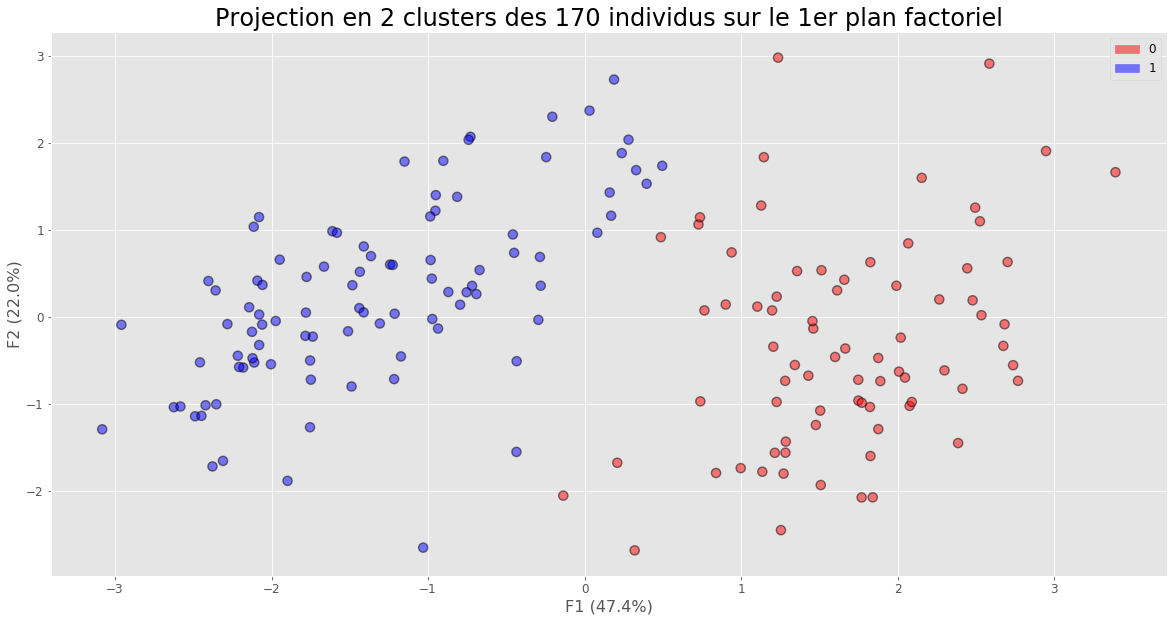

In [42]:
#Visualisation de nos deux clusters dans le premier plan factoriel

plt.figure(figsize=(20, 10))

categories = cls.labels_
colormap = np.array(['red', 'blue'])

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=colormap[categories], 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

lab_0 = mpatches.Patch(color='red', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='blue', alpha=0.5, label='1')
plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 2 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("p6_graphic/projection_kmeans.png")
plt.show()

*Plus de 69% de la variance des données est expliquée par les deux premières composantes, ce qui est plutôt pas mal. L'avantage du K-Means est d'obtenir directement des données centrées/réduites facilitant l'interprétation.* **Voyons ci-dessous les centroïdes des deux clusters pour chacune des 6 variables.**

In [43]:
#Tableau des Centroïdes 2 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls.cluster_centers_
pd.DataFrame(centroids, columns=df.columns)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.079185,0.645141,0.718611,0.840166,0.630841,-0.902645
1,0.064022,-0.521604,-0.581005,-0.679283,-0.510041,0.729798


In [44]:
#Intégration des clusters dans notre dataframe "df_cls" par la méthode .concat()
df_cls = pd.DataFrame(cls.fit_predict(X), columns=['cluster'])
df_cls = pd.concat([df_cls, data], axis=1)
df_cls.head()

,cluster,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,1,True,171.83,103.76,103.76,4.40,2.88,113.84
3,1,True,171.80,103.78,103.65,3.73,3.12,113.63
4,1,True,172.05,103.70,103.75,5.04,2.27,113.55


In [45]:
#Tableau des correspondances clusters/nature billets
tableau = pd.crosstab(cls.labels_,df_cls['is_genuine'])
tableau.index = ['Cluster 0 - Faux','Cluster 1 - True']
tableau.columns = ['Faux','Vrais']
tableau

,Faux,Vrais
Cluster 0 - Faux,68,1
Cluster 1 - True,2,99


*Le clustering apporte une classification des billets en fonction des caractéristiques quantitatives. Il est aussi intéressant de pouvoir utiliser les centroïdes pour se faire une idée complémentaire à celle déjà faite à partir des cercles des corrélations, mais aussi à partir des premiers boxplots établis en début d'analyse.* 

*Concrètement, il ressort toujours des significations entre la nature des billets et les variables 'margin' et 'height', dont les centroïdes sont positifs pour les faux billets, tandis que 'length' sera négatif pour les faux billets.*

**Voyons maintenant comment exploiter cette classification, cette variable binaire 'cluster', toujours en fonction de notre corpus de variables explicatives quantitatives. Ici, nous allons désormais pouvoir modéliser et inférer des propriétés en utilisant une méthode de classification supervisée, la régression logistique.**

---

[Retour vers la page notebook précédente, l'analyse en composantes principales (PCA)](https://github.com/nalron/project_counterfeit_banknote/blob/french_version/p6_notebook02.ipynb)

[Suite du projet par une modélisation supervisée en régression logistique (classification binaire)](https://github.com/nalron/project_counterfeit_banknote/blob/french_version/p6_notebook04.ipynb)